<a href="https://colab.research.google.com/github/hpnightowl/Owlsbooks/blob/master/papers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [375]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

%load_ext google.colab.data_table

data = pd.read_csv("weblog.xls")

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [376]:
data.head()

,IP,Time,URL,Staus
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200


In [377]:
data.describe()

,IP,Time,URL,Staus
count,16007,16007,16007,16007
unique,16,7307,314,13
top,10.128.2.1,cannot,GET /login.php HTTP/1.1,200
freq,4257,167,3284,11330


Text(0.5, 1.0, 'Most Popular Website used by the Users')

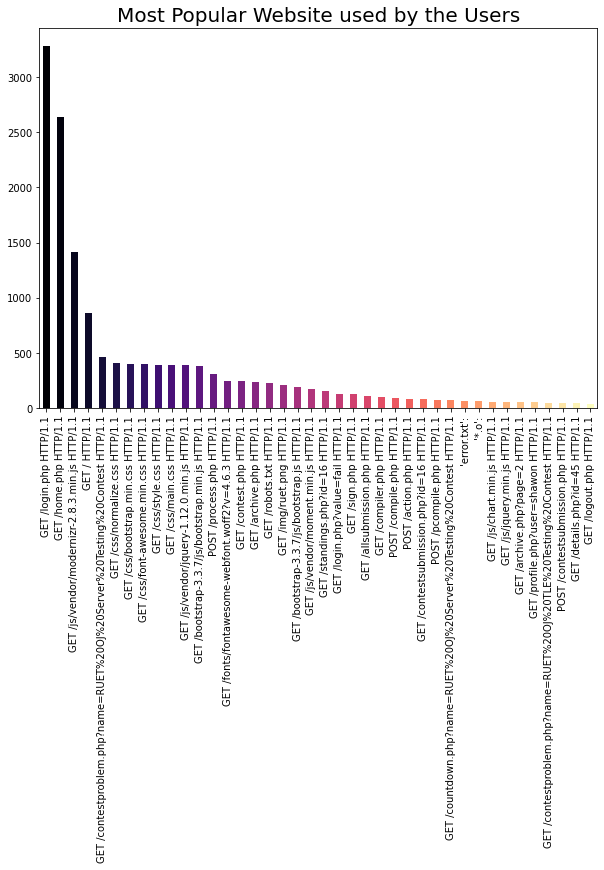

In [378]:
plt.rcParams['figure.figsize'] = (10, 7)

color = plt.cm.magma(np.linspace(0, 1, 40))
data['URL'].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular Website used by the Users', fontsize = 20)

Text(0.5, 1.0, 'Most Popular Requests by the Users')

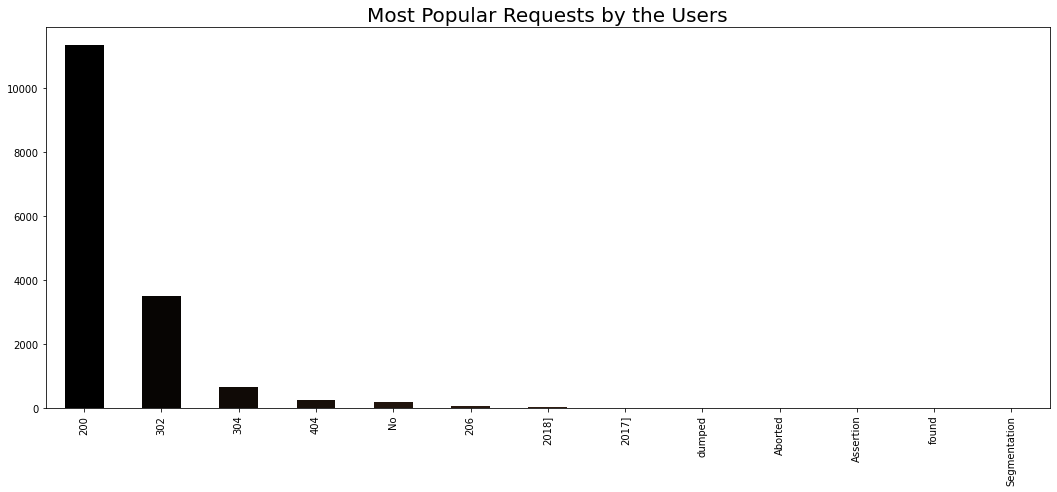

In [379]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
data['Staus'].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular Requests by the Users', fontsize = 20)

In [380]:
save_data = data.copy()
save_data.head()

,IP,Time,URL,Staus
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200


In [381]:
import re

def remove_exten(text):
    pattern = '\.(php|html|asp|aspx|jsp)'
    f = re.findall(pattern, text)
    if f == ['php'] or f == ['html'] or f == ['asp'] or f == ['aspx'] or f == ['jsp']:
      return text
    else:
      return None

In [382]:
data['URL'] = data.URL.apply(remove_exten)

In [383]:
data.head()

,IP,Time,URL,Staus
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,[29/Nov/2017:06:59:04,None,200
4,10.130.2.1,[29/Nov/2017:06:59:06,None,200


In [384]:
data.isnull().sum()

IP          0
Time        0
URL      6508
Staus       0
dtype: int64

In [385]:
data = data.dropna()
ext_len=len(data.URL)

In [386]:
print("Original URL Data count:",len(save_data.URL))
print("After cleaning URL Data count:",ext_len)

Original URL Data count: 16007
After cleaning URL Data count: 9499


In [387]:
import re

def remove_req(text):
    pattern = 'GET'
    f = re.findall(pattern, text)
    if f == ['GET']:
      return text
    else:
      return None

In [388]:
data['URL'] = data.URL.apply(remove_req)

In [389]:
data = data.dropna()

In [390]:
print("Original URL Data count:",len(save_data.URL))
print("after extention removal Data Count:",ext_len)
print("After cleaning URL Data count:",len(data.URL))
print("REMOVED REQUEST OTHER THAN GET REQUEST:",ext_len-len(data.URL))

Original URL Data count: 16007
after extention removal Data Count: 9499
After cleaning URL Data count: 8808
REMOVED REQUEST OTHER THAN GET REQUEST: 691


In [391]:
data.head()

,IP,Time,URL,Staus
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
5,10.130.2.1,[29/Nov/2017:06:59:19,GET /profile.php?user=bala HTTP/1.1,200
8,10.131.2.1,[29/Nov/2017:06:59:30,GET /edit.php?name=bala HTTP/1.1,200
9,10.131.2.1,[29/Nov/2017:06:59:37,GET /logout.php HTTP/1.1,302


In [392]:
data = data.dropna()

In [393]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8808 entries, 0 to 16006
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IP      8808 non-null   object
 1   Time    8808 non-null   object
 2   URL     8808 non-null   object
 3   Staus   8808 non-null   object
dtypes: object(4)
memory usage: 344.1+ KB


In [394]:
def remove_garbage(text):
    pattern = '^\d'
    x = ""
    f = re.findall(pattern, text)
    x = ''.join(f)
    if x.isdigit():
      return text
    else:
      return None

In [395]:
data['IP'] = data.IP.apply(remove_garbage)

In [396]:
data.isnull().sum()

IP       0
Time     0
URL      0
Staus    0
dtype: int64

In [397]:
data = data.dropna()

In [398]:
data['Time'] = pd.to_datetime(data.Time, format='[%d/%b/%Y:%H:%M:%S')

In [399]:
data.head()

,IP,Time,URL,Staus
0,10.128.2.1,2017-11-29 06:58:55,GET /login.php HTTP/1.1,200
2,10.128.2.1,2017-11-29 06:59:03,GET /home.php HTTP/1.1,200
5,10.130.2.1,2017-11-29 06:59:19,GET /profile.php?user=bala HTTP/1.1,200
8,10.131.2.1,2017-11-29 06:59:30,GET /edit.php?name=bala HTTP/1.1,200
9,10.131.2.1,2017-11-29 06:59:37,GET /logout.php HTTP/1.1,302


In [400]:
data = data[data.Staus == '200']

In [401]:
data.head()

,IP,Time,URL,Staus
0,10.128.2.1,2017-11-29 06:58:55,GET /login.php HTTP/1.1,200
2,10.128.2.1,2017-11-29 06:59:03,GET /home.php HTTP/1.1,200
5,10.130.2.1,2017-11-29 06:59:19,GET /profile.php?user=bala HTTP/1.1,200
8,10.131.2.1,2017-11-29 06:59:30,GET /edit.php?name=bala HTTP/1.1,200
10,10.131.2.1,2017-11-29 06:59:37,GET /login.php HTTP/1.1,200


In [402]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6453 entries, 0 to 16006
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   IP      6453 non-null   object        
 1   Time    6453 non-null   datetime64[ns]
 2   URL     6453 non-null   object        
 3   Staus   6453 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 252.1+ KB


In [403]:
data = data.dropna()

In [404]:
data.reset_index()
data.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,IP,Time,URL,Staus
count,6453,6453,6453,6453
unique,5,4972,224,1
top,10.131.0.1,2018-01-29 20:54:33,GET /login.php HTTP/1.1,200
freq,1700,8,3277,6453
first,NaN,2017-11-08 00:39:07,NaN,NaN
last,NaN,2018-03-02 15:47:46,NaN,NaN


In [405]:
data.head()

,IP,Time,URL,Staus
0,10.128.2.1,2017-11-29 06:58:55,GET /login.php HTTP/1.1,200
2,10.128.2.1,2017-11-29 06:59:03,GET /home.php HTTP/1.1,200
5,10.130.2.1,2017-11-29 06:59:19,GET /profile.php?user=bala HTTP/1.1,200
8,10.131.2.1,2017-11-29 06:59:30,GET /edit.php?name=bala HTTP/1.1,200
10,10.131.2.1,2017-11-29 06:59:37,GET /login.php HTTP/1.1,200


In [406]:
x = data['URL'].value_counts().reset_index()

In [407]:
x

,index,URL
0,GET /login.php HTTP/1.1,3277
1,GET /home.php HTTP/1.1,483
2,GET /contestproblem.php?name=RUET%20OJ%20Serve...,393
3,GET /contest.php HTTP/1.1,233
4,GET /archive.php HTTP/1.1,232
...,...,...
219,GET /profile.php?user=mkarzymat HTTP/1.1,1
220,GET /details.php?id=20 HTTP/1.1,1
221,GET /editcontest.php?name=RUET%20OJ%20Server%2...,1
222,GET /contestsubmission.php?id=10&show=shawon H...,1


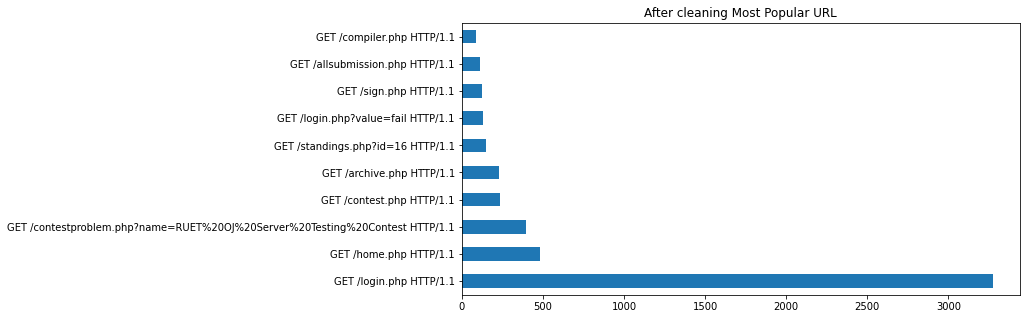

In [417]:
data.URL.value_counts()[:10].plot.barh(figsize=(10,5),title="After cleaning Most Popular URL")

In [409]:
data = data.sort_values(by=['Time','URL'])
data['Time'] = pd.to_datetime(data['Time'])
cond1 = data.Time-data.Time.shift(1) > pd.Timedelta(30,'m')
cond2 = data.URL == data.URL.shift(1)
cond3 = data.IP == data.IP.shift(1)
data['SessionID'] = (cond1 & cond2 & cond3).cumsum()

In [410]:
data.sort_values(by=['IP','SessionID','Time'])
data

,IP,Time,URL,Staus,SessionID
4335,10.129.2.1,2017-11-08 00:39:07,GET /login.php HTTP/1.1,200,0
5453,10.129.2.1,2017-11-08 00:39:07,GET /login.php HTTP/1.1,200,0
4337,10.129.2.1,2017-11-08 01:36:22,GET /login.php HTTP/1.1,200,1
5455,10.129.2.1,2017-11-08 01:36:22,GET /login.php HTTP/1.1,200,1
4339,10.131.0.1,2017-11-08 03:12:46,GET /login.php HTTP/1.1,200,1
...,...,...,...,...,...
16002,10.130.2.1,2018-03-02 15:47:12,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,94
16003,10.130.2.1,2018-03-02 15:47:23,GET /allsubmission.php HTTP/1.1,200,94
16004,10.130.2.1,2018-03-02 15:47:32,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,94
16005,10.130.2.1,2018-03-02 15:47:35,GET /allsubmission.php HTTP/1.1,200,94


In [411]:
data.SessionID

4335      0
5453      0
4337      1
5455      1
4339      1
         ..
16002    94
16003    94
16004    94
16005    94
16006    94
Name: SessionID, Length: 6453, dtype: int64

In [412]:
data['month'] = data['Time'].dt.month
data['day'] = data['Time'].dt.day

In [413]:
size = data['month'].value_counts()
size

11    3208
1     2081
12     686
2      413
3       65
Name: month, dtype: int64

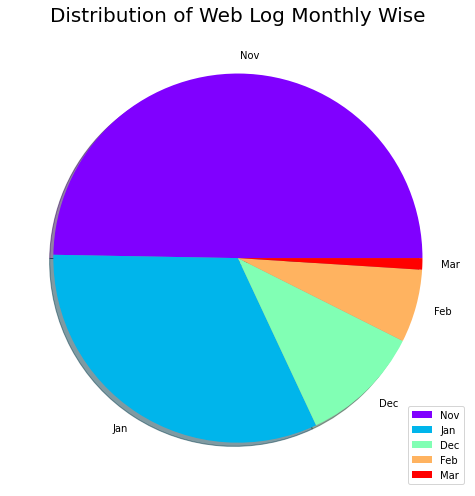

In [414]:
labels = "Nov", "Jan","Dec","Feb","Mar"

size = data['month'].value_counts()
color = plt.cm.rainbow(np.linspace(0, 1, 5))

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = color, labels= labels,shadow = True)
plt.title('Distribution of Web Log Monthly Wise', fontsize = 20)
plt.tight_layout()
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Web Log on Daily Basis')

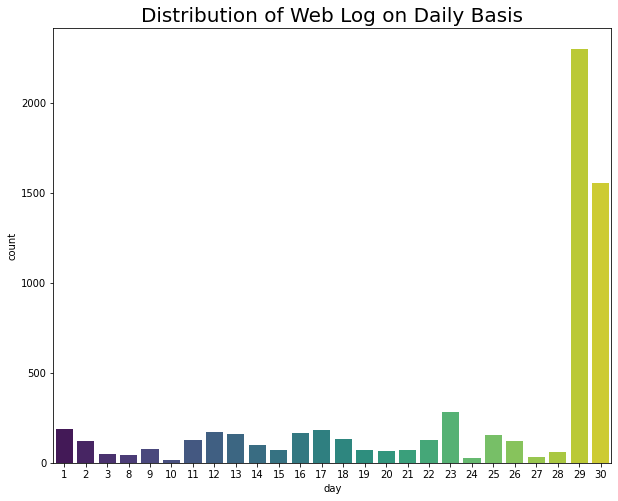

In [415]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.countplot(data['day'], palette = 'viridis')
plt.title('Distribution of Web Log on Daily Basis', fontsize = 20)